# MTA Data Challenges

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

In [2]:
sns.set_style('whitegrid')

**Challenge 1**

Open up a new IPython notebook
Download a few MTA turnstile data files
Open up a file, use csv reader to read it, make a python dict where there is a key for each (C/A, UNIT, SCP, STATION). These are the first four columns. The value for this key should be a list of lists. Each list in the list is the rest of the columns in a row. For example, one key-value pair should look like
{ ('A002','R051','02-00-00','LEXINGTON AVE'): [ ['NQR456', 'BMT', '01/03/2015', '03:00:00', 'REGULAR', '0004945474', '0001675324'], ['NQR456', 'BMT', '01/03/2015', '07:00:00', 'REGULAR', '0004945478', '0001675333'], ['NQR456', 'BMT', '01/03/2015', '11:00:00', 'REGULAR', '0004945515', '0001675364'], ... ] }

In [3]:
# df = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_170513.txt')
def get_data(week_nums):
    # base url
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        # concat our week onto url..
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [170422, 170429, 170506, 170513]

df = get_data(week_nums)
df.columns = map(str.lower, df.columns)

In [4]:
df.columns.tolist()

['c/a',
 'unit',
 'scp',
 'station',
 'linename',
 'division',
 'date',
 'time',
 'desc',
 'entries',
 'exits                                                               ']

In [5]:
df.columns = [column.strip() for column in df.columns]

In [6]:
df.head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/15/2017,00:00:00,REGULAR,6136580,2078941
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/15/2017,04:00:00,REGULAR,6136613,2078947
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/15/2017,08:00:00,REGULAR,6136639,2078987
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/15/2017,12:00:00,REGULAR,6136799,2079109
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/15/2017,16:00:00,REGULAR,6137076,2079173


**Challenge 2**

Let's turn this into a time series.
For each key (basically the control area, unit, device address and station of a specific turnstile), have a list again, but let the list be comprised of just the point in time and the count of entries.

This basically means keeping only the date, time, and entries fields in each list. You can convert the date and time into datetime objects -- That is a python class that represents a point in time. You can combine the date and time fields into a string and use the dateutil module to convert it into a datetime object. For an example check this StackOverflow question.

Your new dict should look something like

{ ('A002','R051','02-00-00','LEXINGTON AVE'): [ [datetime.datetime(2013, 3, 2, 3, 0), 3788], [datetime.datetime(2013, 3, 2, 7, 0), 2585], [datetime.datetime(2013, 3, 2, 12, 0), 10653], [datetime.datetime(2013, 3, 2, 17, 0), 11016], [datetime.datetime(2013, 3, 2, 23, 0), 10666], [datetime.datetime(2013, 3, 3, 3, 0), 10814], [datetime.datetime(2013, 3, 3, 7, 0), 10229], ... ], .... }

In [7]:
df['date_time'] = pd.to_datetime(df['date'] + ' ' + df['time'],format="%m/%d/%Y %H:%M:%S")

In [8]:
df['date'] = pd.to_datetime(df['date'], format="%m/%d/%Y")

In [9]:
df['time'] = pd.to_datetime(df['time'])#, format='%H:%M:%S')

In [10]:
df['time'] = df.time.dt.time

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 789772 entries, 0 to 196860
Data columns (total 12 columns):
c/a          789772 non-null object
unit         789772 non-null object
scp          789772 non-null object
station      789772 non-null object
linename     789772 non-null object
division     789772 non-null object
date         789772 non-null datetime64[ns]
time         789772 non-null object
desc         789772 non-null object
entries      789772 non-null int64
exits        789772 non-null int64
date_time    789772 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 78.3+ MB


In [12]:
df.head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-04-15,00:00:00,REGULAR,6136580,2078941,2017-04-15 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-04-15,04:00:00,REGULAR,6136613,2078947,2017-04-15 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-04-15,08:00:00,REGULAR,6136639,2078987,2017-04-15 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-04-15,12:00:00,REGULAR,6136799,2079109,2017-04-15 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-04-15,16:00:00,REGULAR,6137076,2079173,2017-04-15 16:00:00


**Challenge 3**

* These counts are for every n hours. (What is n?) 

We want total daily entries.
Now make it that we again have the same keys, but now we have a single value for a single day, which is the total number of passengers that entered through this turnstile on this day.

In [14]:
df.sort_values(['c/a', 'unit', 'scp', 'station','date_time'], inplace=True, ascending=True)

In [15]:
df['daily_entries'] = df.groupby(['c/a', 'unit', 'scp', 'station'])['entries'].diff()

In [16]:
df.head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time,daily_entries
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-04-15,00:00:00,REGULAR,6136580,2078941,2017-04-15 00:00:00,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-04-15,04:00:00,REGULAR,6136613,2078947,2017-04-15 04:00:00,33.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-04-15,08:00:00,REGULAR,6136639,2078987,2017-04-15 08:00:00,26.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-04-15,12:00:00,REGULAR,6136799,2079109,2017-04-15 12:00:00,160.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-04-15,16:00:00,REGULAR,6137076,2079173,2017-04-15 16:00:00,277.0


In [17]:
def clean_entries(row, max_counter):
    each = row["daily_entries"]
    if each < 0:
        each = -each
    if each > max_counter:
        return 0
    return each

df['daily_entries'] = df.apply(clean_entries, axis=1, max_counter=10000)

In [18]:
df.daily_entries.isnull().sum()

4699

In [19]:
df.dropna(subset=["daily_entries"], axis=0, inplace=True)

In [20]:
df.head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time,daily_entries
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-04-15,04:00:00,REGULAR,6136613,2078947,2017-04-15 04:00:00,33.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-04-15,08:00:00,REGULAR,6136639,2078987,2017-04-15 08:00:00,26.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-04-15,12:00:00,REGULAR,6136799,2079109,2017-04-15 12:00:00,160.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-04-15,16:00:00,REGULAR,6137076,2079173,2017-04-15 16:00:00,277.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-04-15,20:00:00,REGULAR,6137520,2079204,2017-04-15 20:00:00,444.0


**Challenge 4**

We will plot the daily time series for a turnstile.

Take the list of [(date1, count1), (date2, count2), ...], for the turnstile and turn it into two lists: dates and counts. This should plot it:

```python
plt.figure(figsize=(10,3))
plt.plot(dates,counts)
```

In [21]:
stationMask = ((df["c/a"] == "A002") & 
(df["unit"] == "R051") & 
(df["scp"] == "02-00-00") & 
(df["station"] == "59 ST"))

In [22]:
sampleStation = df[stationMask]

In [23]:
sampleStation.shape

(169, 13)

In [24]:
dateGroup = sampleStation.groupby('date').daily_entries.sum()

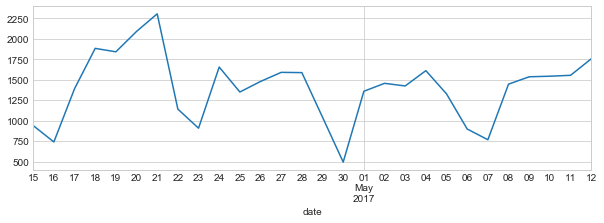

In [41]:
dateGroup.plot(figsize=(10,3))

**Challenge 5**

- So far we've been operating on a single turnstile level, let's combine turnstiles in the same ControlArea/Unit/Station combo. 

There are some ControlArea/Unit/Station groups that have a single turnstile, but most have multiple turnstilea-- same value for the C/A, UNIT and STATION columns, different values for the SCP column.
We want to combine the numbers together -- for each ControlArea/UNIT/STATION combo, for each day, add the counts from each turnstile belonging to that combo.

In [26]:
# mask2 = ((df["c/a"] == "A002") & 
# (df["unit"] == "R051") &  
# (df["station"] == "59 ST"))

In [27]:
cusDay = df.groupby(['c/a','unit','station','date']).daily_entries.sum().reset_index()

In [28]:
cusDay.shape

(20472, 5)

In [29]:
cusDay.head()

,c/a,unit,station,date,daily_entries
0,A002,R051,59 ST,2017-04-15,7487.0
1,A002,R051,59 ST,2017-04-16,6951.0
2,A002,R051,59 ST,2017-04-17,12839.0
3,A002,R051,59 ST,2017-04-18,14583.0
4,A002,R051,59 ST,2017-04-19,14975.0


**Challenge 6**

Similarly, combine everything in each station, and come up with a time series of [(date1, count1),(date2,count2),...] type of time series for each STATION, by adding up all the turnstiles in a station.

In [30]:
stationDaily = cusDay.groupby(['station','date']).daily_entries.sum().reset_index()

In [31]:
stationDaily.shape

(10456, 3)

In [32]:
stationDaily.head()

,station,date,daily_entries
0,1 AV,2017-04-15,11837.0
1,1 AV,2017-04-16,11716.0
2,1 AV,2017-04-17,17238.0
3,1 AV,2017-04-18,19657.0
4,1 AV,2017-04-19,22889.0


**Challenge 7**

Plot the time series for a station.

In [33]:
sampleStation = stationDaily[stationDaily.station == '59 ST']

In [34]:
sampleGroup = sampleStation.groupby('date').daily_entries.sum()

In [37]:
sampleGroup[:5]

date
2017-04-15    38349.0
2017-04-16    34666.0
2017-04-17    65644.0
2017-04-18    74319.0
2017-04-19    79868.0
Name: daily_entries, dtype: float64

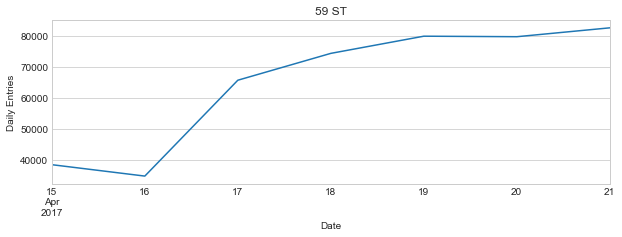

In [42]:
sampleGroup[:7].plot(figsize=(10,3))
plt.title('59 ST')
plt.ylabel('Daily Entries')
plt.xlabel('Date')

**Challenge 8**

- Make one list of counts for one week for one station. Monday's count, Tuesday's count, etc. so it's a list of 7 counts. Make the same list for another week, and another week, and another week. plt.plot(week_count_list) for every week_count_list you created this way. You should get a rainbow plot of weekly commute numbers on top of each other.

In [43]:
df['week'] = df.date_time.dt.weekofyear

In [44]:
df.head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time,daily_entries,week
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-04-15,04:00:00,REGULAR,6136613,2078947,2017-04-15 04:00:00,33.0,15
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-04-15,08:00:00,REGULAR,6136639,2078987,2017-04-15 08:00:00,26.0,15
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-04-15,12:00:00,REGULAR,6136799,2079109,2017-04-15 12:00:00,160.0,15
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-04-15,16:00:00,REGULAR,6137076,2079173,2017-04-15 16:00:00,277.0,15
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-04-15,20:00:00,REGULAR,6137520,2079204,2017-04-15 20:00:00,444.0,15


In [45]:
df['day'] = df.date_time.dt.dayofweek

In [46]:
df.head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time,daily_entries,week,day
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-04-15,04:00:00,REGULAR,6136613,2078947,2017-04-15 04:00:00,33.0,15,5
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-04-15,08:00:00,REGULAR,6136639,2078987,2017-04-15 08:00:00,26.0,15,5
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-04-15,12:00:00,REGULAR,6136799,2079109,2017-04-15 12:00:00,160.0,15,5
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-04-15,16:00:00,REGULAR,6137076,2079173,2017-04-15 16:00:00,277.0,15,5
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,2017-04-15,20:00:00,REGULAR,6137520,2079204,2017-04-15 20:00:00,444.0,15,5


In [49]:
sampleStation = df[df.station == '59 ST']
stationWeek = sampleStation.groupby(['week','day']).daily_entries.sum().reset_index()

In [50]:
stationWeek.head()

,week,day,daily_entries
0,15,5,38349.0
1,15,6,34666.0
2,16,0,65644.0
3,16,1,74319.0
4,16,2,79868.0


In [54]:
day_ticks = ('Mon','Tues','Wed','Thurs','Fri','Sat','Sun')

([<matplotlib.axis.XTick at 0x13dd61a20>,
 <a list of 7 Text xticklabel objects>)

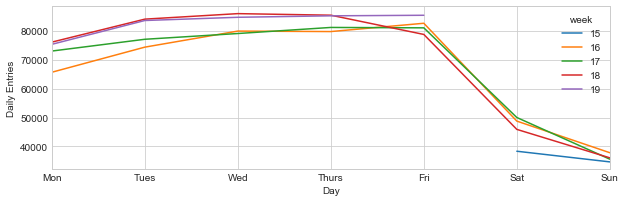

In [55]:
stationWeek.pivot('day','week','daily_entries').plot(kind='line',figsize=(10,3))
plt.ylabel('Daily Entries')
plt.xlabel('Day')
plt.xticks(range(7),day_ticks)

**Challenge 9**
- Over multiple weeks, sum total ridership for each station and sort them, so you can find out the stations with the highest traffic during the time you investigate

In [75]:
stationWeekGroup = df.groupby(['station','week']).daily_entries.sum().reset_index()
stationWeekGroup.sort_values('daily_entries',ascending=False,inplace=True)
stationWeekGroup.head(10)

,station,week,daily_entries
306,34 ST-PENN STA,16,1033673.0
307,34 ST-PENN STA,17,1027601.0
308,34 ST-PENN STA,18,1019415.0
1161,GRD CNTRL-42 ST,17,903644.0
1160,GRD CNTRL-42 ST,16,898640.0
1162,GRD CNTRL-42 ST,18,886439.0
309,34 ST-PENN STA,19,851369.0
296,34 ST-HERALD SQ,16,808313.0
297,34 ST-HERALD SQ,17,799705.0
232,23 ST,17,789863.0


**Challenge 10**
- Make a single list of these total ridership values and plot it with

plt.hist(total_ridership_counts)

to get an idea about the distribution of total ridership among different stations.

This should show you that most stations have a small traffic, and the histogram bins for large traffic volumes have small bars.

Additional Hint:

If you want to see which stations take the meat of the traffic, you can sort the total ridership counts and make a plt.bar graph. For this, you want to have two lists: the indices of each bar, and the values. The indices can just be 0,1,2,3,..., so you can do

```python
indices = range(len(total_ridership_values))
plt.bar(indices, total_ridership_values)
```

(array([  7.62445000e+05,   2.10450000e+04,   1.43600000e+03,
          1.05000000e+02,   3.30000000e+01,   2.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          4.00000000e+00]),
 array([    0. ,   883.8,  1767.6,  2651.4,  3535.2,  4419. ,  5302.8,
         6186.6,  7070.4,  7954.2,  8838. ]),
 <a list of 10 Patch objects>)

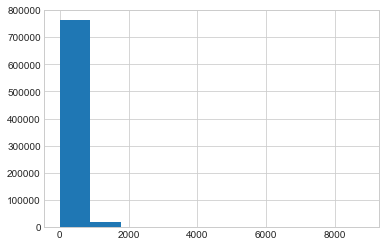

In [76]:
plt.hist(df.daily_entries_entries)